<h2 style = "color : Orange "> Exploratory Data Analysis - Sports </h>

# Author : Mayur Padore

## Data Science and Business Analytics

## GRIP @ The Sparks Foundation

## Task #5 : "Exploratory Data Analysis : Sports (Indian Premier League)"



## Problem Statement:  

-  1. Find out the most successful teams, players and factors contributing win or loss of a team.


-  2. Suggest teams or players a company should endorse for its products.

# 1. Import the Libraries and Warnings

In [1]:
# Importing the Warning

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the libraries which are we going to use for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

#  2. Read Dataset

In [3]:
#  Read matches.csv file

df1 = pd.read_csv("matches.csv")       

In [4]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df1.shape

(756, 18)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
#  Read deliveries.csv file

df2 = pd.read_csv("deliveries.csv")                     

In [8]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
df2.shape

(179078, 21)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# 3. Data Merging

-  Merge dataset by using Left Join

In [11]:
ipl_df = pd.merge(df1, df2, left_on='id', right_on='match_id', how='left')

ipl_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
print("Size of Matches dataset : ",df1.shape )
print("\nSize of Deliveries dataset : ",df2.shape )
print("\nSize of Merge dataset : ",ipl_df.shape )

Size of Matches dataset :  (756, 18)

Size of Deliveries dataset :  (179078, 21)

Size of Merge dataset :  (179078, 39)


In [13]:
ipl_df.isnull().sum()

id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
umpire2                500
umpire3             150712
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
d

In [14]:
# ipl_df.to_csv("Merge_DF.csv", index=False)

# 4. Data Cleaning

### Handling Missing values

- For Matches dataframe

In [14]:
df1.shape

(756, 18)

In [15]:
df1.isnull().sum().sort_values(ascending = False)

umpire3            637
city                 7
winner               4
player_of_match      4
umpire2              2
umpire1              2
venue                0
win_by_wickets       0
win_by_runs          0
id                   0
season               0
result               0
toss_decision        0
toss_winner          0
team2                0
team1                0
date                 0
dl_applied           0
dtype: int64

In [16]:
(df1.isnull().mean()*100).sort_values(ascending = False)

umpire3            84.259259
city                0.925926
winner              0.529101
player_of_match     0.529101
umpire2             0.264550
umpire1             0.264550
venue               0.000000
win_by_wickets      0.000000
win_by_runs         0.000000
id                  0.000000
season              0.000000
result              0.000000
toss_decision       0.000000
toss_winner         0.000000
team2               0.000000
team1               0.000000
date                0.000000
dl_applied          0.000000
dtype: float64

-  We can see that, "umpire3" has maximum numbers of missing values which is 84.25 % of the dataset, so we can remove that column

-  Also, "umpire1" & "umpire2" has missing value , so we can remove that columns.


In [17]:
df1 = df1.drop(columns = ["umpire3", "umpire2", "umpire1"])

#### Handling Missing values for "city" column

In [18]:
df1["city"].isnull().sum()

7

In [19]:
df1.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [20]:
df1.city.nunique()

32

-   "city" is related to "venue", so check on those columns

In [21]:
df1[df1["city"].isnull()][["city","venue"]]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


-  As all of the missing values are from "Dubai International Cricket Stadium". So we can fill the missing value by "Dubai".

In [22]:
df1["city"] = df1["city"].fillna("Dubai")

In [23]:
df1["city"].isnull().sum()

0

####  Handling missing values for "winner" & "player_of_match" columns

In [24]:
df1["winner"].isnull().sum()

4

In [25]:
df1["player_of_match"].isnull().sum()

4

-  If we look at the dataset, these two columns are empty because, the match result is not declared due to rain or any other technical malfunction.

-  so, we can drop that entries from the dataset

In [26]:
df1 = df1.dropna(subset=['player_of_match', 'winner'])

df1.isnull().sum().sort_values(ascending = False)

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

### Handling Missing values


-  For Deliveries dataframe

In [27]:
df2.shape

(179078, 21)

In [28]:
df2.isnull().sum().sort_values(ascending = False)

fielder             172630
dismissal_kind      170244
player_dismissed    170244
bye_runs                 0
total_runs               0
extra_runs               0
batsman_runs             0
penalty_runs             0
noball_runs              0
legbye_runs              0
match_id                 0
inning                   0
is_super_over            0
bowler                   0
non_striker              0
batsman                  0
ball                     0
over                     0
bowling_team             0
batting_team             0
wide_runs                0
dtype: int64

-  We can see that columns "fielder", "dismissal_kind", "player_dismissed", has maximum nubers of missing values, so it's better to drop those columns.

In [29]:
df2 = df2.drop(columns = ["fielder", "dismissal_kind", "player_dismissed"])

df2.isnull().sum().sort_values(ascending = False)

match_id         0
inning           0
extra_runs       0
batsman_runs     0
penalty_runs     0
noball_runs      0
legbye_runs      0
bye_runs         0
wide_runs        0
is_super_over    0
bowler           0
non_striker      0
batsman          0
ball             0
over             0
bowling_team     0
batting_team     0
total_runs       0
dtype: int64

-  Now, Both the datasets are clean and there are no missing value present.

In [30]:
# Convert the 'date' column to a datetime data type for date-based analysis.

df1['date'] = pd.to_datetime(df1['date'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               752 non-null    int64         
 1   season           752 non-null    int64         
 2   city             752 non-null    object        
 3   date             752 non-null    datetime64[ns]
 4   team1            752 non-null    object        
 5   team2            752 non-null    object        
 6   toss_winner      752 non-null    object        
 7   toss_decision    752 non-null    object        
 8   result           752 non-null    object        
 9   dl_applied       752 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      752 non-null    int64         
 12  win_by_wickets   752 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            752 non-null    object   

In [31]:
df1.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [32]:
df2.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [33]:
ipl_df.isnull().sum()

id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
umpire2                500
umpire3             150712
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
d

## Save this data for further visualisation on tools like Tableau or Power BI

In [35]:
# df1.to_csv("Matches_cleaned.csv", index=False)

# df2.to_csv("Deliveries_cleaned.csv", index=False)


---------------------------

# 5. EDA Exploratory Data Analysis

- Before doing the analysis, I have prepared some questions based on which I will analyze it.

Q) How many season have taken place in IPL so far?

Q) In a Particular season, No of Teams participated ?

Q) How many matches played in each season?

Q) Teams who won in each season?

Q) No of times, each team won?

Q) Highest Runs scored by team each season and in all of the season?

Q) Highest Runs scored by individual batsman in each season and in all the season?

Q) Top Ten Player of the match in each season?

Q) Team who won toss and won match also?

Q) Top Team who won by high margin like "Win by wickets" and "win by runs"?

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               752 non-null    int64         
 1   season           752 non-null    int64         
 2   city             752 non-null    object        
 3   date             752 non-null    datetime64[ns]
 4   team1            752 non-null    object        
 5   team2            752 non-null    object        
 6   toss_winner      752 non-null    object        
 7   toss_decision    752 non-null    object        
 8   result           752 non-null    object        
 9   dl_applied       752 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      752 non-null    int64         
 12  win_by_wickets   752 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            752 non-null    object   

----------------

## Data Visualization

## Total number of Team participate in each season

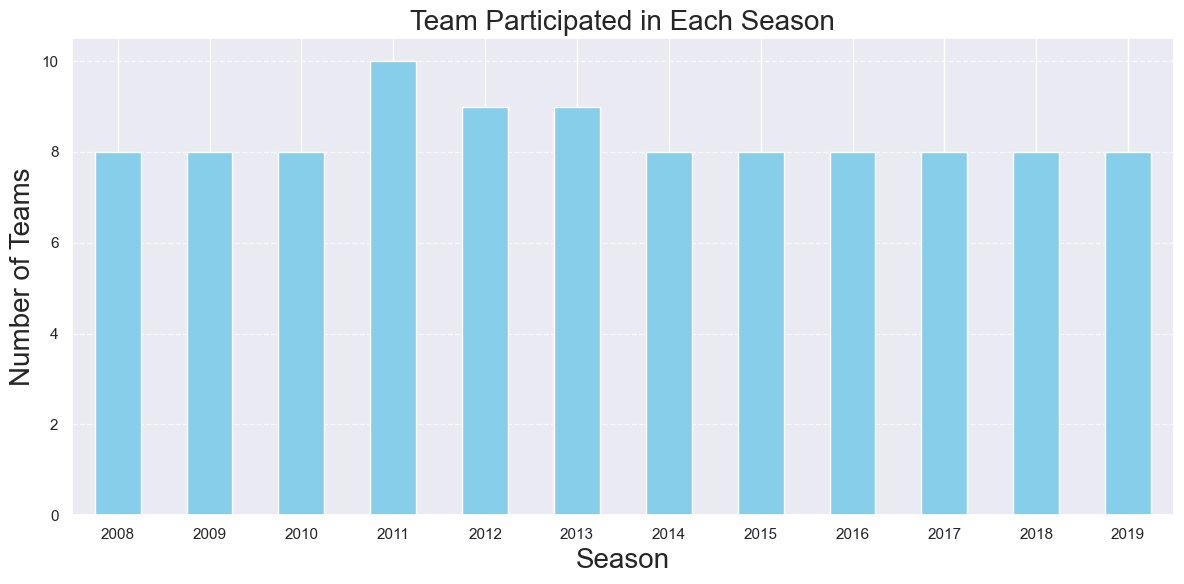

In [122]:
season_participation = df1.groupby('season')['team1'].nunique()

plt.figure(figsize=(12, 6))
season_participation.plot(kind='bar', color='skyblue')
plt.title('Team Participated in Each Season', size=20)
plt.xlabel('Season', size=20)
plt.ylabel('Number of Teams', size=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

-  In 2011, 10 Team participated. 
-  In 2012 & 2013, 9 Team participated.
-  Rest other season 8 Team are participated.

## Total number of Matches Played in each season

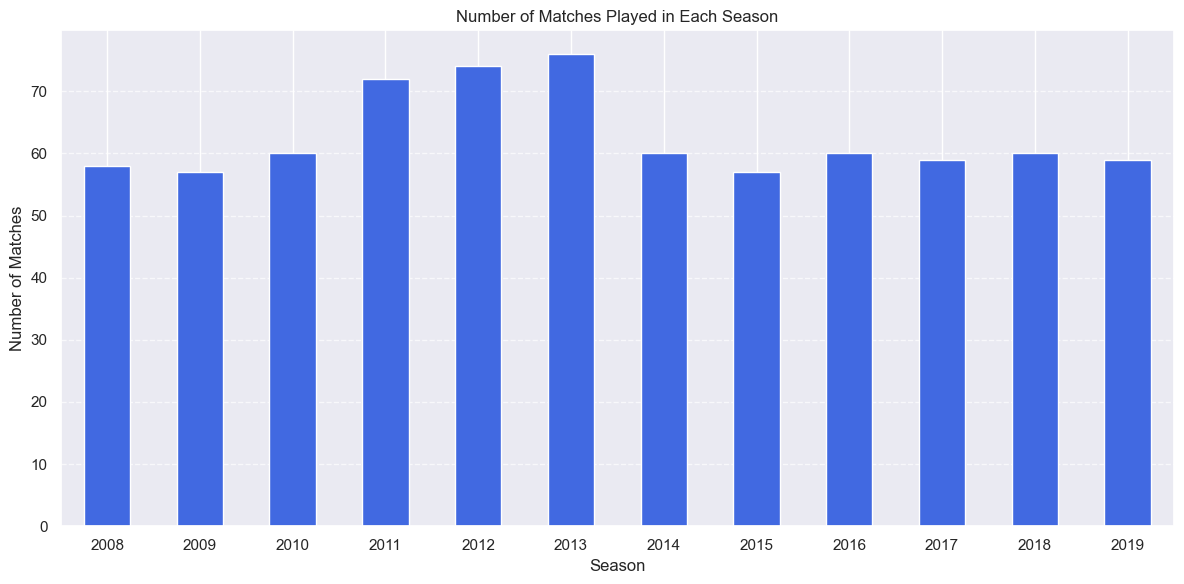

In [41]:
matches_per_season = df1['season'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
matches_per_season.plot(kind='bar', color='royalblue')
plt.title('Number of Matches Played in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

-  In 2011, 2012 & 2013, more than 70 matches played.

## Total Number of Matches Won by Each Team

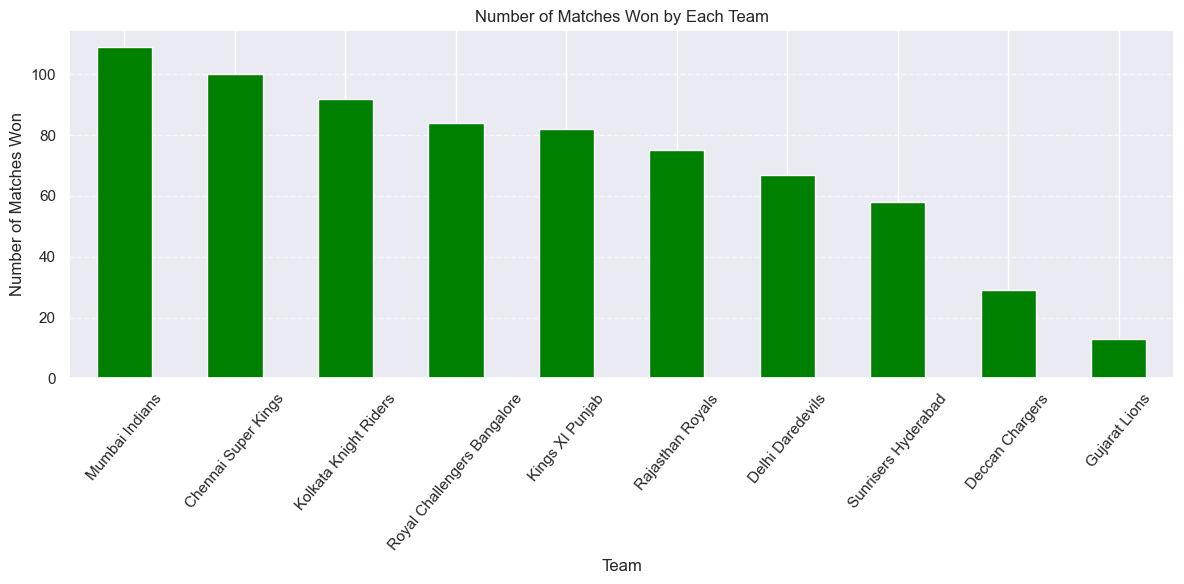

In [123]:
matches_won_by_team = df1['winner'].value_counts()[0:10]

plt.figure(figsize=(12, 6))
matches_won_by_team.plot(kind='bar', color='green')
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

-  "Mumbai Indians" & "Chennai Super Kings" are the Top Winner in the IPL Season. While the "Mumbai Indians" won more than 100 matches and "Chennai Super Kings" is on the 2nd Rank with 100 matches.

## Total Matches Played in Each Venue

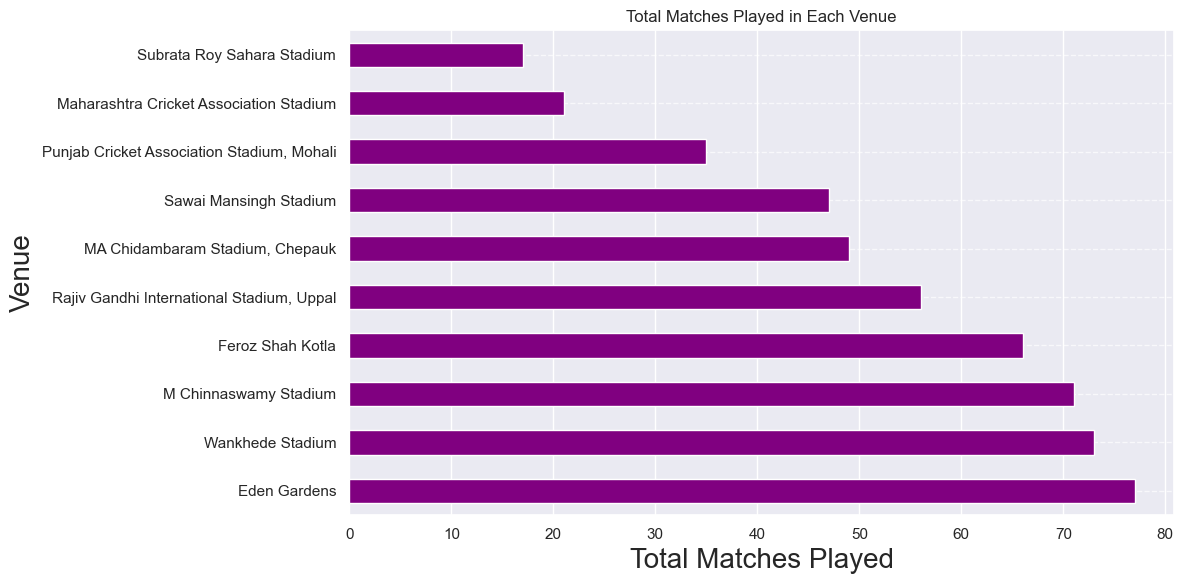

In [138]:
matches_per_venue = df1['venue'].value_counts()[0:10]

plt.figure(figsize=(12, 6))
matches_per_venue.plot(kind='barh', color='purple')
plt.title('Total Matches Played in Each Venue')
plt.xlabel('Total Matches Played', size = 20)
plt.ylabel('Venue', size = 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

-  Maximum number of matches played in "Eden Gardens" & "Wankhede Stadium".
-  Because of its magnitude, Eden Gardens is well-known among the various grounds in India and internationally. Its concrete seats formerly housed 100,000 people.
-  The Wankhede ground in Mumbai is among India’s largest cricket venues and was the site of the 2011 World Cup match. This stadium offers all of the conveniences and features that make this one of the top sites to watch cricket matches in India. 

## Number of times Team won toss

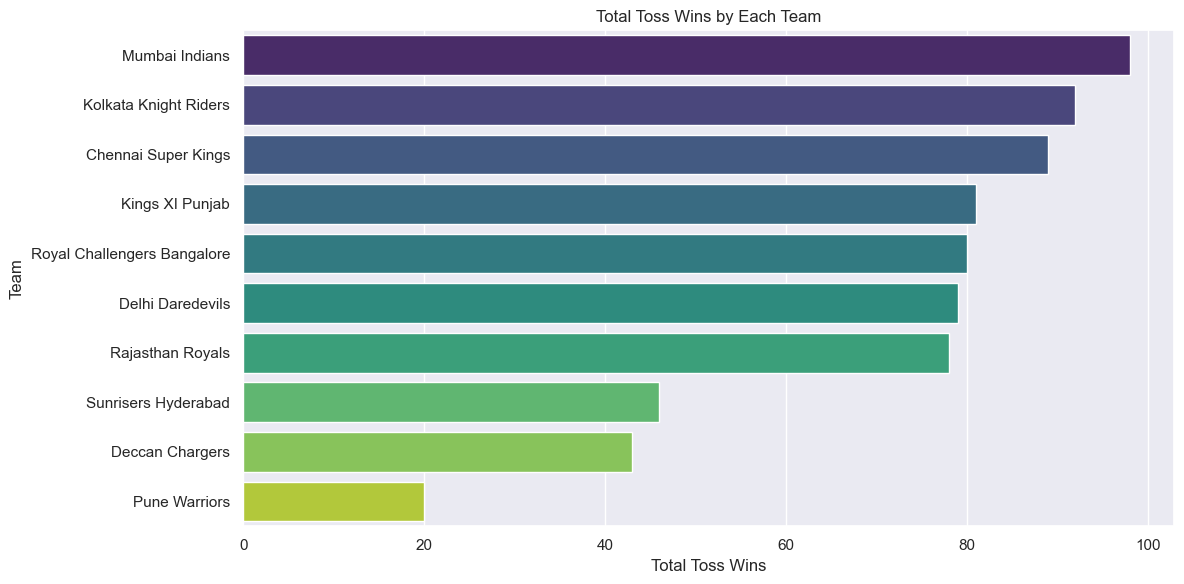

In [53]:
toss_wins = df1['toss_winner'].value_counts().reset_index()[:10]
toss_wins.columns = ['Team', 'Toss Wins']

plt.figure(figsize=(12, 6))
sns.barplot(x='Toss Wins', y='Team', data=toss_wins, palette='viridis')
plt.title('Total Toss Wins by Each Team')
plt.xlabel('Total Toss Wins')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

## Toss Decisions After Winning the Toss

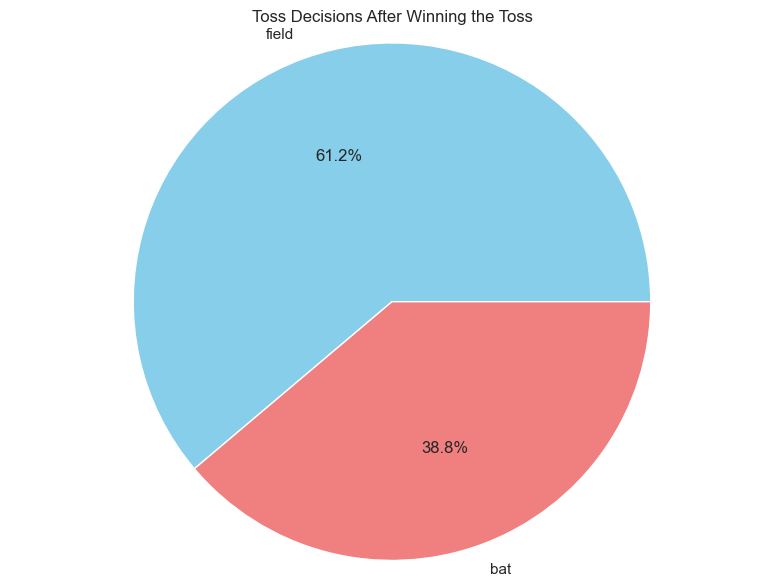

In [58]:
toss_decisions = df1['toss_decision'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(toss_decisions, labels=toss_decisions.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Toss Decisions After Winning the Toss')
plt.axis('equal') 
plt.tight_layout()
plt.show()

-  After winning the toss, Team like to choose filed first rather than bat first.

## Top Man of the Match Performers

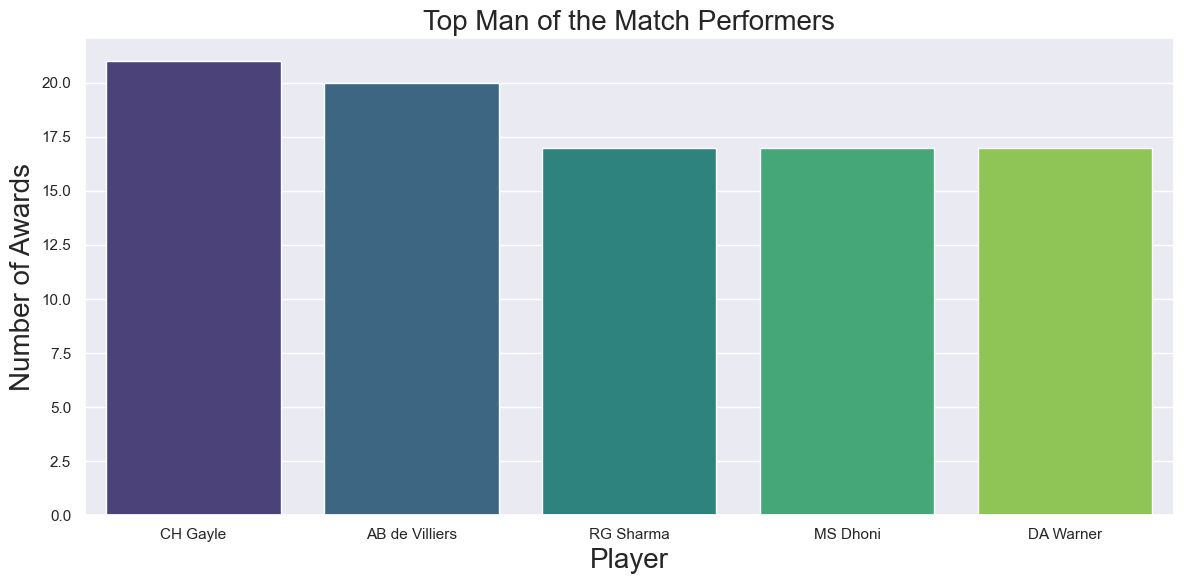

In [154]:
top_players = df1['player_of_match'].value_counts().head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_players.index, y=top_players.values, palette='viridis')
plt.title('Top Man of the Match Performers', size=20)
plt.xlabel('Player', size=20)
plt.ylabel('Number of Awards', size=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Highest Runs scorer Team in the IPL Season

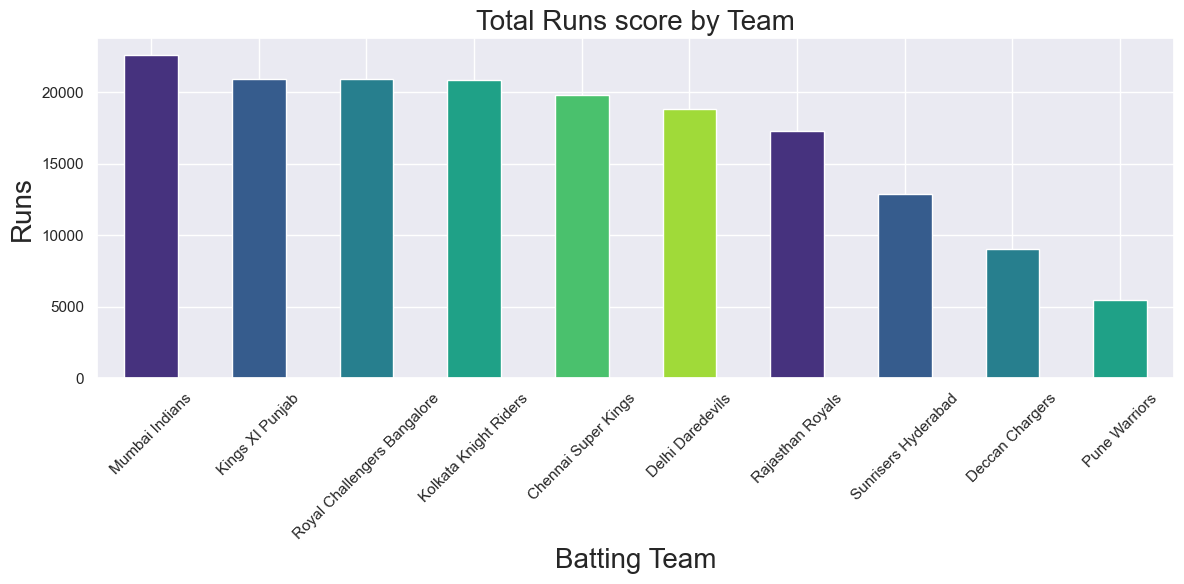

In [155]:
plt.figure(figsize=(12, 6))
ipl_df['batting_team'].value_counts()[0:10].plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Total Runs score by Team', size=20)
plt.xlabel('Batting Team', size=20)
plt.ylabel('Runs', size=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

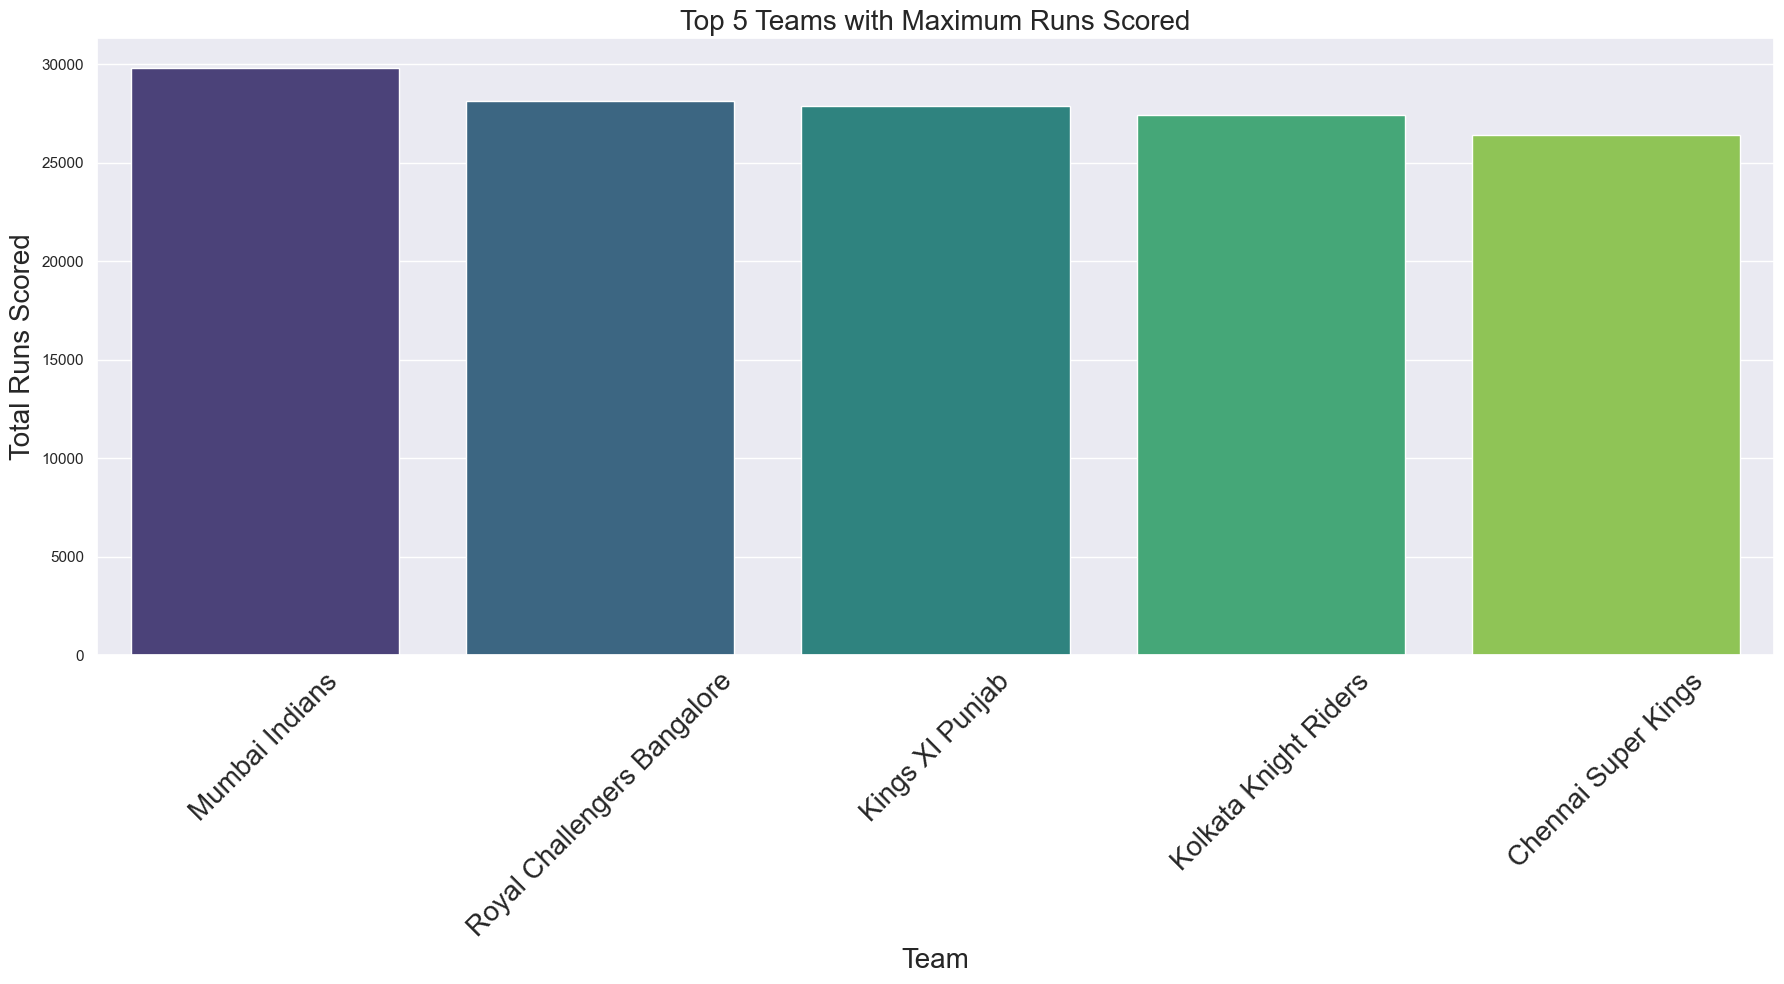

In [165]:
runs_scored_by_team = ipl_df.groupby('batting_team')['total_runs'].sum().reset_index()

top_5_teams = runs_scored_by_team.sort_values(by='total_runs', ascending=False).head(5)

plt.figure(figsize=(18, 10))
sns.barplot(x='batting_team', y='total_runs', data=top_5_teams, palette='viridis')
plt.title('Top 5 Teams with Maximum Runs Scored', size=20)
plt.xlabel('Team', size=20)
plt.ylabel('Total Runs Scored', size=20)
plt.xticks(rotation=45, size=20)
plt.tight_layout()
plt.show()

## Top 5 Batsmen with Maximum Runs Scored

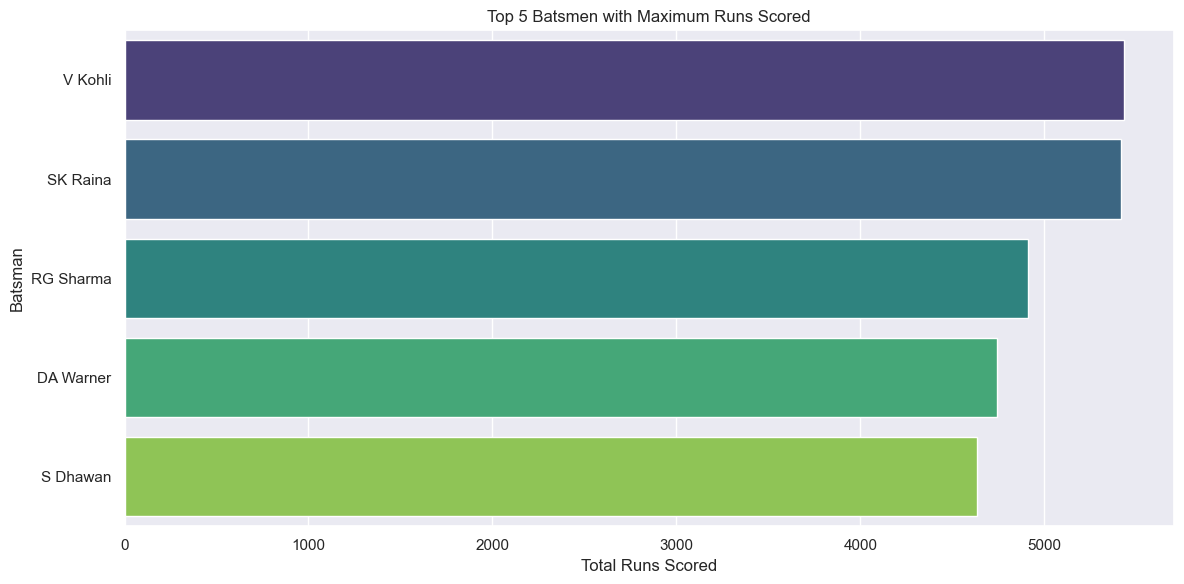

In [166]:
runs_scored_by_batsman = ipl_df.groupby('batsman')['batsman_runs'].sum().reset_index()

top_5_batsmen = runs_scored_by_batsman.sort_values(by='batsman_runs', ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='batsman_runs', y='batsman', data=top_5_batsmen, palette='viridis')
plt.title('Top 5 Batsmen with Maximum Runs Scored')
plt.xlabel('Total Runs Scored')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()

## Top 5 Bowlers with Most Wickets

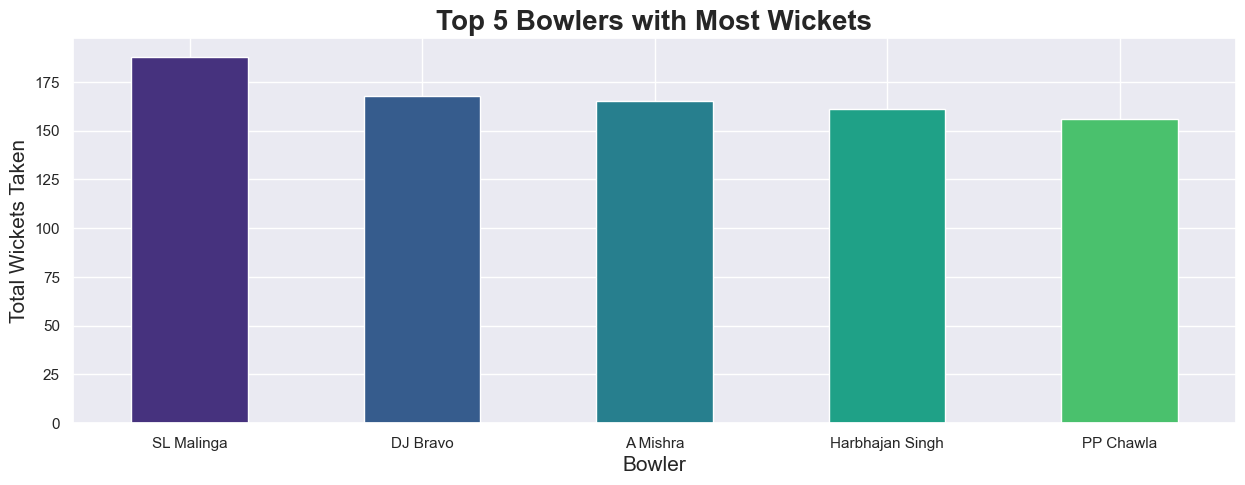

In [167]:
plt.figure(figsize=(18, 6))

ipl_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(5).plot(kind='bar', 
                                                color=sns.color_palette('viridis'), figsize=(15, 5))

plt.title("Top 5 Bowlers with Most Wickets", fontsize=20, fontweight='bold')
plt.xlabel("Bowler", size=15)
plt.ylabel("Total Wickets Taken", size=15)
plt.xticks(rotation=0)
plt.show()

## Batsman with Highest strike rate

In [110]:
no_of_balls = pd.DataFrame(ipl_df.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(ipl_df.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(ipl_df.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100

highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                           ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


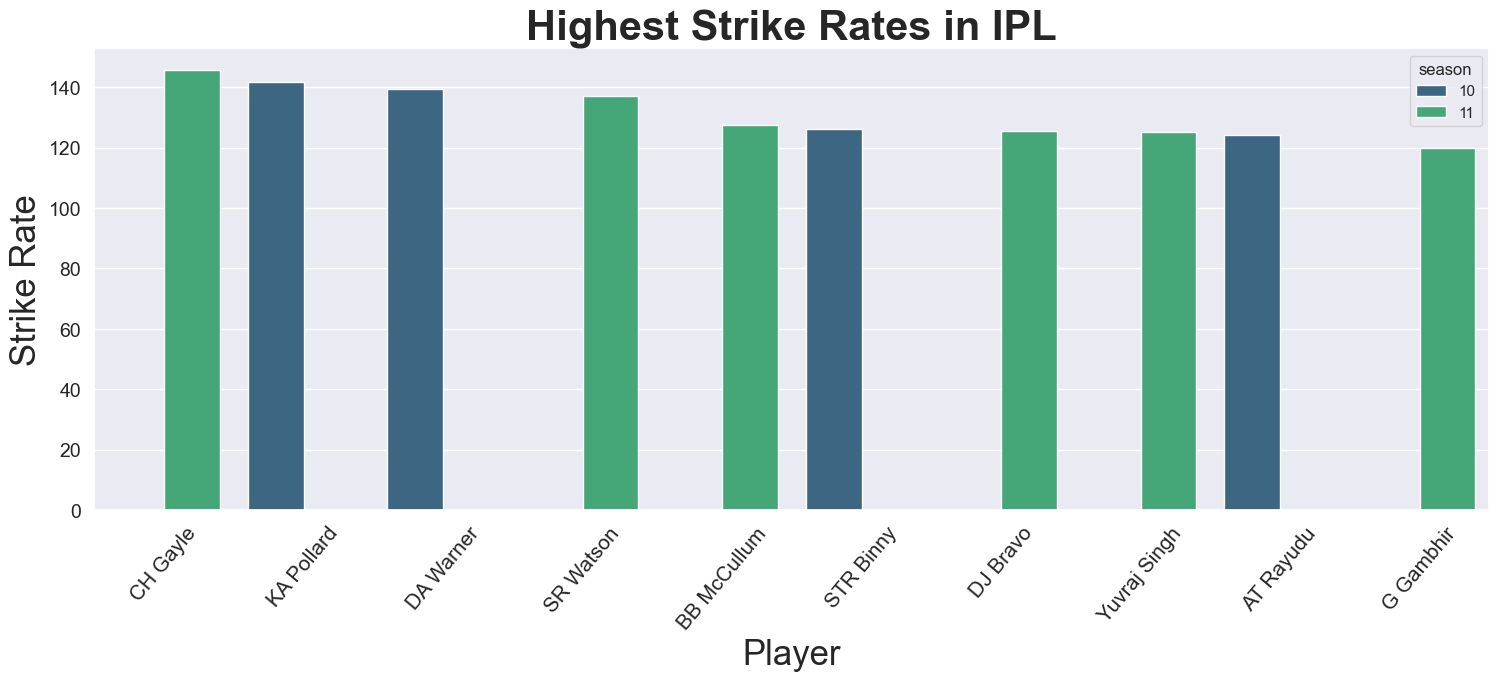

In [169]:
plt.figure(figsize=(18, 6))
sns.barplot(x='batsman', y='strike_rate', data=highest_strike_rate.head(10), hue='season', palette='viridis')
plt.title("Highest Strike Rates in IPL", fontsize=30, fontweight='bold')
plt.xlabel("Player", size=25)
plt.ylabel("Strike Rate", size=25)
plt.xticks(size=15, rotation=50)
plt.yticks(size=14)
plt.show()

<h2 style = "color : Grey "> Conclusion : </h>

<!-- Up until 2019, there are total 12 season played. In, 2011, 10 Team are participated which is the highest among all.


In all of the season, 2011, 2012 & 2013 more than 70 matches played, which is the highest in number.


Mumbai Indians & Chennai Super Kings are the Top Winner in the IPL Season. While the Mumbai Indians won more than 100 matches and Chennai Super Kings is on the 2nd Rank with 100 matches.


Maximum number of matches played in "Eden Gardens" & "Wankhede Stadium".


Mumbai Indian, Kolkata Knight Riders & Chennai Super Kings are the top winner with most Toss Win. 


After winning the toss, Most of the Team like to choose filed first rather than bat first. 61.2% Team choose Field first and 38.8% Team choose Bat First.


Mumbai Indians, Royal Challengers Bangalore, Kings XI Punjab, Kolkata Knight Riders are the Top 5 Team with more than 25000 Runs in IPL season. 


CH Gayle, AB de Villiers, RG Sharma, MS Dhoni, DA Warner are the top 5 Players with more than 15 times won Player of the Match Award in the IPL season.


V Kohli, SK Raina, RG Sharma, DA Warner, S Dhawan are the Top 5 Batsman with Highest runs scorer in the IPL season.


SL Malinga, DJ Bravo, A Mishra, Harbhajan Singh, PP Chawla are the Top 5 Bowler with Highest wicket taker.


CH Gayle, KA Pollard, DA Warner, SR Watson are the Top 4 Batsman with Highest Strike Rate -->


-    Up until 2019, there are total 12 season played. In, 2011, 10 Team are participated which is the highest among all.


-    In all of the season, 2011, 2012 & 2013 more than 70 matches played, which is the highest in number.


-    Mumbai Indians & Chennai Super Kings are the Top Winner in the IPL Season. While the Mumbai Indians won more than 100 matches and Chennai Super Kings is on the 2nd Rank with 100 matches.



-    Maximum number of matches played in "Eden Gardens" & "Wankhede Stadium".



-    Mumbai Indian, Kolkata Knight Riders & Chennai Super Kings are the top winner with most Toss Win. 



-    After winning the toss, Most of the Team like to choose filed first rather than bat first. 61.2% Team choose Field first and 38.8% Team choose Bat First.



-    Mumbai Indians, Royal Challengers Bangalore, Kings XI Punjab, Kolkata Knight Riders and Chennai Super Kings are the Top 5 Team with more than 25000 Runs in IPL season. 



- CH Gayle, AB de Villiers, RG Sharma, MS Dhoni, DA Warner are the top 5 Players with more than 15 times won Player of the Match Award in the IPL season.



- V Kohli, SK Raina, RG Sharma, DA Warner, S Dhawan are the Top 5 Batsman with Highest runs scorer in the IPL season.



- SL Malinga, DJ Bravo, A Mishra, Harbhajan Singh, PP Chawla are the Top 5 Bowler with Highest wicket taker.



- CH Gayle, KA Pollard, DA Warner, SR Watson are the Top 4 Batsman with Highest Strike Rate


### Suggest teams or players a company should endorse for its products.

-  If the Company is looking for the Succesfull team for its promoting its product, Mumbai Indians, Royal Challengers Bangalore, Kings XI Punjab, Kolkata Knight Riders and Chennai Super Kings are the succesful team and its popularity is high among people

-  If the Company is looking for the Star Player, I highly recommend considering CH Gayle, AB de Villiers, RG Sharma, MS Dhoni, DA Warner. These esteemed athletes have consistently propelled their respective teams to victory through exceptional individual contributions.

-  If the Company is looking for the Top Batsman, V Kohli, SK Raina, RG Sharma, DA Warner, S Dhawan are the most succesful Batsman.

-  If the Company is looking for the Top Bowler, SL Malinga, DJ Bravo, A Mishra, Harbhajan Singh, PP Chawla are the most succesful Bowlers.